# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [74]:
## YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np

import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

In [75]:
income_raw = pd.read_csv("Datasets/IncomeByCounty.csv")
vaccine_count_cal = pd.read_csv("Datasets/DosesAdminsteredbyCounty(California).csv", thousands=',')
vaccine_count_wash = pd.read_csv("Datasets/Doses(Washington).csv", thousands=',')
vaccine_count_geor = pd.read_csv("Datasets/Georgia Doses.csv", thousands=',')
vaccine_count_ohio = pd.read_csv("Datasets/Ohio Doses.csv", thousands=',')
vaccine_count_ariz = pd.read_csv("Datasets/Arizona Doses.csv", thousands=',')
vaccine_count_kans = pd.read_csv("Datasets/Kansas_Doses_Income_Data_raw.csv")

group = income_raw.groupby("LineCode")

counties = group.get_group(1)["GeoName"].reset_index()
del counties["index"]


income_data = group.get_group(1)["2019"].reset_index()
del income_data["index"]

population_data = group.get_group(2)["2019"].reset_index()
del population_data["index"]

county_data = pd.DataFrame(counties)
county_data = county_data.rename(columns={"GeoName": "County"})

county_data["Total Income"] = income_data
county_data["Population"] = population_data


#Remove NA from Dataset for accurate int datatype
county_data = county_data.replace("(NA)", "1")
#Convert object data to int
county_data["Total Income"] = pd.to_numeric(county_data["Total Income"])
county_data["Population"] = pd.to_numeric(county_data["Population"])


#Calculate Income per Capita
percapitaincome = county_data.apply(lambda row: row["Total Income"] / row["Population"], axis = 1).reset_index()
del percapitaincome["index"]
county_data["Income per Capita"] = percapitaincome
county_data.to_csv("CleanedIncomePerCapita.csv")

#Seperate County and State
count_state_temp = county_data["County"].str.split(", ", n = 1, expand = True) 
county_data.drop(columns =["County"], inplace = True) 

county_data["County"] = count_state_temp[0]
county_data["State"] = count_state_temp[1]

#filter only california counties
cal_income = county_data[(county_data.State == "CA")]

#filter only washington counties
wash_income = county_data[(county_data.State == "WA")]

#filter only arizona counties
ariz_income = county_data[(county_data.State == "AZ") | ((county_data.State == "AZ*"))]

#filter only ohio counties
ohio_income = county_data[(county_data.State == "OH")]

#filter only georgia counties
geor_income = county_data[(county_data.State == "GA")]

#filer only kansas counties
kans_income = county_data[(county_data.State == "KS")]

In [76]:
merged_cal = cal_income.merge(vaccine_count_cal, "inner", "County")
merged_cal.info()
merged_cal.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 6 columns):
Total Income          58 non-null int64
Population            58 non-null int64
Income per Capita     58 non-null float64
County                58 non-null object
State                 58 non-null object
Doses Administered    58 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.2+ KB


,Total Income,Population,Income per Capita,County,State,Doses Administered
0,135663560,1671329,81.171068,Alameda,CA,350830
1,81463,1129,72.155004,Alpine,CA,450
2,1825410,39752,45.919954,Amador,CA,8031
3,10490209,219186,47.859850,Butte,CA,50346
4,2347168,45905,51.130988,Calaveras,CA,9462


In [77]:
merged_wash = wash_income.merge(vaccine_count_wash, "inner", "County")
merged_wash = merged_wash.rename(columns = {"Vaccine Doses Given": "Doses Administered"})
merged_wash.info()
merged_wash.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 8 columns):
Total Income                     39 non-null int64
Population                       39 non-null int64
Income per Capita                39 non-null float64
County                           39 non-null object
State                            39 non-null object
Doses Administered               39 non-null int64
People Initiating Vaccination    39 non-null int64
People Fully Vaccinated          39 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ KB


,Total Income,Population,Income per Capita,County,State,Doses Administered,People Initiating Vaccination,People Fully Vaccinated
0,867839,19983,43.428865,Adams,WA,3375,2097,685
1,1094225,22582,48.455628,Asotin,WA,4808,2625,978
2,10087552,204390,49.354430,Benton,WA,41142,24261,7685
3,4342733,77200,56.253018,Chelan,WA,31552,15869,6052
4,3700741,77331,47.855853,Clallam,WA,30843,20215,10663


In [78]:
merged_ariz = ariz_income.merge(vaccine_count_ariz, "inner", "County")
merged_ariz.info()
merged_ariz.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 6 columns):
Total Income          15 non-null int64
Population            15 non-null int64
Income per Capita     15 non-null float64
County                15 non-null object
State                 15 non-null object
Doses Administered    15 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 840.0+ bytes


,Total Income,Population,Income per Capita,County,State,Doses Administered
0,2529614,71887,35.188755,Apache,AZ,7555
1,5259219,125922,41.765688,Cochise,AZ,23144
2,7057376,143476,49.188547,Coconino,AZ,44455
3,2226470,54018,41.217187,Gila,AZ,13236
4,1238695,38837,31.894714,Graham,AZ,5772


In [79]:
merged_ohio = ohio_income.merge(vaccine_count_ohio, "inner", "County")
merged_ohio.info()
merged_ohio.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 6 columns):
Total Income          87 non-null int64
Population            87 non-null int64
Income per Capita     87 non-null float64
County                87 non-null object
State                 87 non-null object
Doses Administered    87 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


,Total Income,Population,Income per Capita,County,State,Doses Administered
0,976876,27698,35.268828,Adams,OH,1873
1,4481729,102351,43.787838,Allen,OH,9947
2,2138133,53484,39.977059,Ashland,OH,3823
3,3866977,97241,39.766940,Ashtabula,OH,8866
4,2273150,65327,34.796485,Athens,OH,6062


In [80]:
def standardize_county(string):
    string = string.strip()
    string = string.replace("County", "")
    string = string.strip()
    
    return string
        

In [81]:
vaccine_count_geor["County"] = vaccine_count_geor["County"].apply(standardize_county)

merged_geor = geor_income.merge(vaccine_count_geor, "inner", "County")
merged_geor.info()
merged_geor.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 6 columns):
Total Income          159 non-null int64
Population            159 non-null int64
Income per Capita     159 non-null float64
County                159 non-null object
State                 159 non-null object
Doses Administered    159 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 8.7+ KB


,Total Income,Population,Income per Capita,County,State,Doses Administered
0,652960,18386,35.513978,Appling,GA,5964
1,257538,8165,31.541702,Atkinson,GA,853
2,372801,11164,33.393139,Bacon,GA,5964
3,125538,3038,41.322581,Baker,GA,956
4,1532017,44890,34.128247,Baldwin,GA,3406


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [82]:
color_dict = {"all": "black", "cal": "blue", "wash": "red", "geor": "pink", "ohio": "green", "ariz": "yellow"}
states = ["cal", "wash", "ariz", "ohio", "geor"]
state_name = {"cal": "California", "wash": "Washigton", "ariz": "Arizona", "ohio": "Ohio", "geor": "Georgia"}
dataset_dict = {"cal": merged_cal, "wash": merged_wash, "ariz": merged_ariz, "ohio": merged_ohio, "geor": merged_geor}

In [83]:
for state in states:
    vaccine_per_capita = dataset_dict[state].apply(lambda row: row["Doses Administered"] / row["Population"], axis = 1)
    dataset_dict[state]["Doses per Capita"] = vaccine_per_capita

In [84]:
all_states = pd.concat([merged_cal, merged_wash, merged_ohio, merged_geor, merged_ariz], sort=False)
all_states.head()

,Total Income,Population,Income per Capita,County,State,Doses Administered,Doses per Capita,People Initiating Vaccination,People Fully Vaccinated
0,135663560,1671329,81.171068,Alameda,CA,350830,0.209911,NaN,NaN
1,81463,1129,72.155004,Alpine,CA,450,0.398583,NaN,NaN
2,1825410,39752,45.919954,Amador,CA,8031,0.202028,NaN,NaN
3,10490209,219186,47.859850,Butte,CA,50346,0.229695,NaN,NaN
4,2347168,45905,51.130988,Calaveras,CA,9462,0.206121,NaN,NaN


Income per Capita Centered Around: 44.571637735316585 thousand dollars
Doses Administered Centered Around: 35808.18156424581 Doses
Doses per Capita Centered Around: 0.16217074016684008 Doses


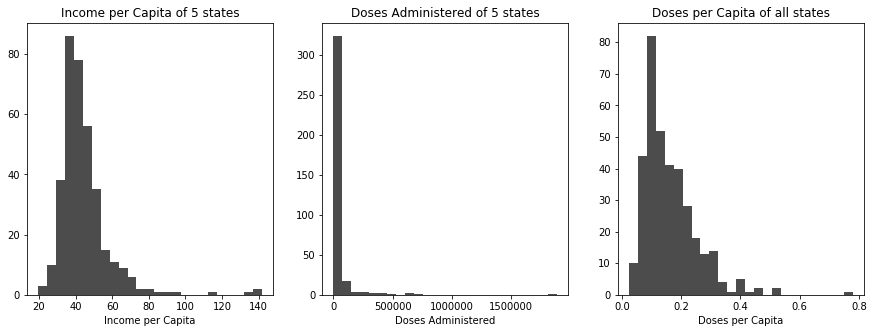

In [85]:
num_bins = 25
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.hist(all_states["Income per Capita"], num_bins, facecolor='black', alpha=0.7)
ax1.set_title("Income per Capita of 5 states")
ax1.set_xlabel("Income per Capita")
print("Income per Capita Centered Around: " + str(all_states["Income per Capita"].mean()) + " thousand dollars")
ax2.hist(all_states["Doses Administered"], num_bins, facecolor='black', alpha=0.7)
print("Doses Administered Centered Around: " + str(all_states["Doses Administered"].mean()) + " Doses")
ax2.set_title("Doses Administered of 5 states")
ax2.set_xlabel("Doses Administered")
ax3.hist(all_states["Doses per Capita"], num_bins, facecolor='black', alpha=0.7)
print("Doses per Capita Centered Around: " + str(all_states["Doses per Capita"].mean()) + " Doses")
ax3.set_title("Doses per Capita of all states")
ax3.set_xlabel("Doses per Capita")
plt.show()

In [86]:
def plot_hist(state):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    print("Income per Capita Centered Around: " + str(dataset_dict[state]["Income per Capita"].mean()) + " thousand dollars")
    print("Doses Administered Centered Around: " + str(dataset_dict[state]["Doses Administered"].mean()) + " Doses")
    print("Doses per Capita Centered Around: " + str(dataset_dict[state]["Doses per Capita"].mean()) + " Doses")
    ax1.hist(dataset_dict[state]["Income per Capita"], num_bins, facecolor=color_dict[state], alpha=0.7)
    ax1.set_title("Income per Capita " + state_name[state])
    ax1.set_xlabel("Income per Capita")
    ax2.hist(dataset_dict[state]["Doses Administered"], num_bins, facecolor=color_dict[state], alpha=0.7)
    ax2.set_title("Doses Administered " + state_name[state])
    ax2.set_xlabel("Doses Administered ")
    ax3.hist(dataset_dict[state]["Doses per Capita"], num_bins, facecolor=color_dict[state], alpha=0.7)
    ax3.set_title("Doses per Capita " + state_name[state])
    ax3.set_xlabel("Doses per Capita")
    plt.show()

Income per Capita Centered Around: 59.397167427549704 thousand dollars
Doses Administered Centered Around: 129513.46551724138 Doses
Doses per Capita Centered Around: 0.19283967172250172 Doses


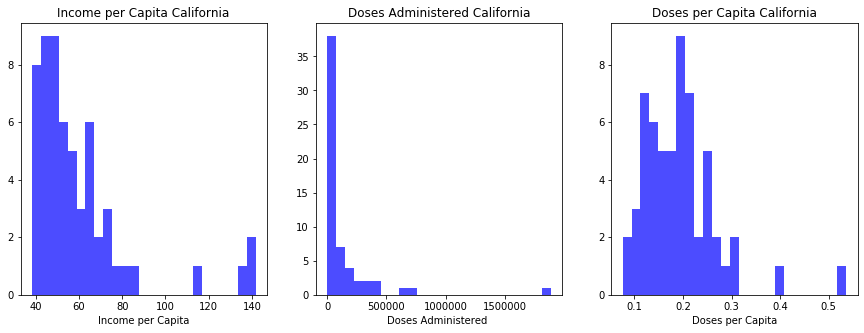

In [87]:
#histogram of california income per capita
plot_hist("cal")

Income per Capita Centered Around: 50.03624334231999 thousand dollars
Doses Administered Centered Around: 34393.02564102564 Doses
Doses per Capita Centered Around: 0.19924457483459873 Doses


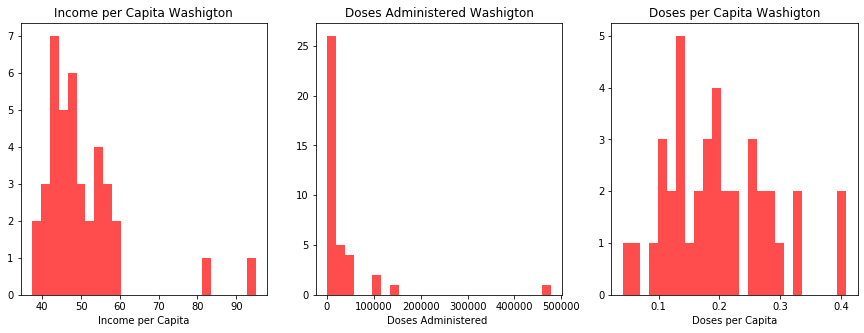

In [88]:
#histogram of washington income per capita
plot_hist("wash")

Income per Capita Centered Around: 39.19665141654348 thousand dollars
Doses Administered Centered Around: 78217.13333333333 Doses
Doses per Capita Centered Around: 0.20335400287904776 Doses


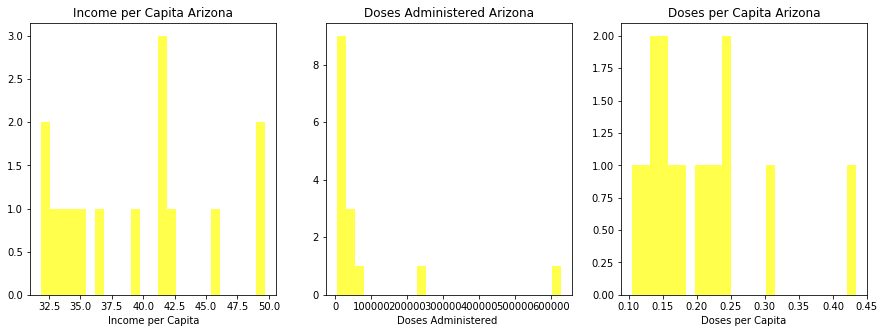

In [89]:
#histogram of arizona income per capita
plot_hist("ariz")

Income per Capita Centered Around: 44.86432920173931 thousand dollars
Doses Administered Centered Around: 12749.6091954023 Doses
Doses per Capita Centered Around: 0.09136646885231682 Doses


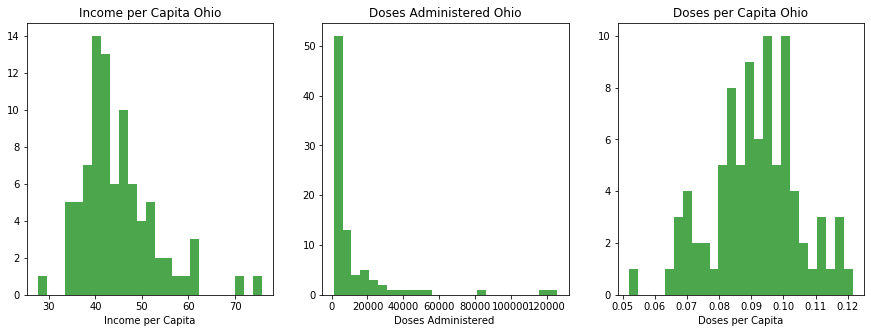

In [90]:
#histogram of ohio income per capita
plot_hist("ohio")

Income per Capita Centered Around: 38.17013016538052 thousand dollars
Doses Administered Centered Around: 10589.603773584906 Doses
Doses per Capita Centered Around: 0.1767464953958304 Doses


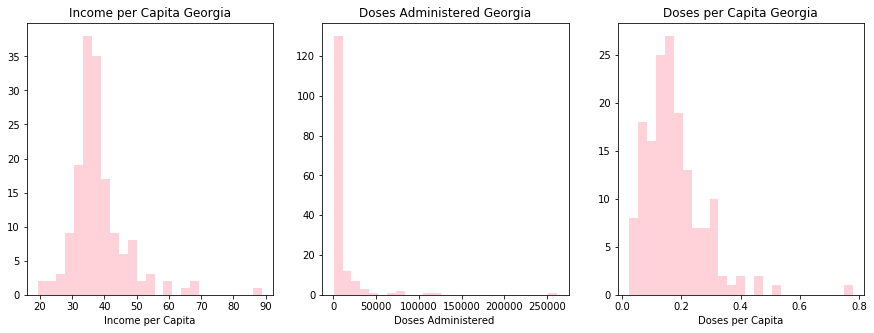

In [91]:
#histogram of ohio income per capita
plot_hist("geor")

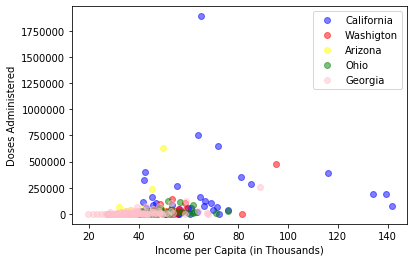

In [92]:
for state in states:
    plt.plot(dataset_dict[state]["Income per Capita"], dataset_dict[state]["Doses Administered"], color = color_dict[state], 
             marker='o', alpha = 0.5, linestyle="None", label = state_name[state])
    
plt.xlabel("Income per Capita (in Thousands)")
plt.ylabel("Doses Administered")
plt.legend()
plt.show()

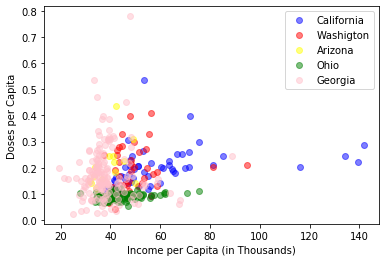

In [93]:
for state in states:
    plt.plot(dataset_dict[state]["Income per Capita"], dataset_dict[state]["Doses per Capita"], color = color_dict[state], marker='o',
             alpha = 0.5, linestyle="None", label = state_name[state])
plt.xlabel("Income per Capita (in Thousands)")
plt.ylabel("Doses per Capita")
plt.legend()
plt.show()

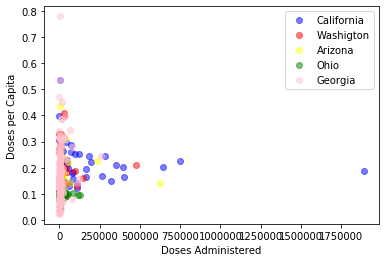

In [94]:
for state in states:
    plt.plot(dataset_dict[state]["Doses Administered"], dataset_dict[state]["Doses per Capita"], color = color_dict[state], marker='o',
             alpha = 0.5, linestyle="None", label = state_name[state])
plt.xlabel("Doses Administered")
plt.ylabel("Doses per Capita")
plt.legend()
plt.show()

In [100]:
all_states_lin = all_states.rename(columns = {"Income per Capita": "IPC", "Doses per Capita": "DPC"})

outcome_1, predictors_1 = patsy.dmatrices(formula_like = "DPC ~ IPC", data = all_states_lin)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

                            OLS Regression Results                            
Dep. Variable:                    DPC   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     6.478
Date:                Wed, 10 Mar 2021   Prob (F-statistic):             0.0113
Time:                        22:15:01   Log-Likelihood:                 350.40
No. Observations:                 358   AIC:                            -696.8
Df Residuals:                     356   BIC:                            -689.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1241      0.016      7.893      0.0

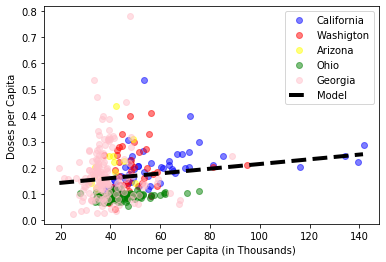

In [119]:
print(res_1.summary())

for state in states:
    plt.plot(dataset_dict[state]["Income per Capita"], dataset_dict[state]["Doses per Capita"], color = color_dict[state], marker='o',
             alpha = 0.5, linestyle="None", label = state_name[state])
plt.xlabel("Income per Capita (in Thousands)")
plt.ylabel("Doses per Capita")
xs = np.arange(all_states['Income per Capita'].min(), all_states['Income per Capita'].max())
ys = 0.1241 + (0.0009 * xs)
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.legend()

In [120]:
def linear_model_state(state):
    state_lin = dataset_dict[state].rename(columns = {"Income per Capita": "IPC", "Doses per Capita": "DPC"})

    outcome_s, predictors_s = patsy.dmatrices(formula_like = "DPC ~ IPC", data = state_lin)
    mod_s = sm.OLS(outcome_s, predictors_s)
    res_s = mod_s.fit()
    print(res_s.summary())
    
    plt.plot(dataset_dict[state]["Income per Capita"], dataset_dict[state]["Doses per Capita"], color = color_dict[state], marker='o',
             alpha = 0.5, linestyle="None", label = state_name[state])
    plt.xlabel("Income per Capita (in Thousands)")
    plt.ylabel("Doses per Capita")
    
    xs = np.arange(dataset_dict[state]['Income per Capita'].min(), dataset_dict[state]['Income per Capita'].max())
    ys = res_s.params[0] + (res_s.params[1] * xs)
    plt.plot(xs, ys, '--k', linewidth=4, label='Model')
    plt.legend()

                            OLS Regression Results                            
Dep. Variable:                    DPC   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     9.185
Date:                Wed, 10 Mar 2021   Prob (F-statistic):            0.00369
Time:                        22:15:02   Log-Likelihood:                 72.347
No. Observations:                  58   AIC:                            -140.7
Df Residuals:                      56   BIC:                            -136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1203      0.026      4.683      0.0

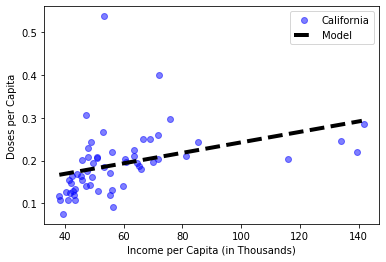

In [121]:
linear_model_state("cal")

                            OLS Regression Results                            
Dep. Variable:                    DPC   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.796
Date:                Wed, 10 Mar 2021   Prob (F-statistic):             0.0313
Time:                        22:16:01   Log-Likelihood:                 253.92
No. Observations:                  87   AIC:                            -503.8
Df Residuals:                      85   BIC:                            -498.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0740      0.008      9.160      0.0

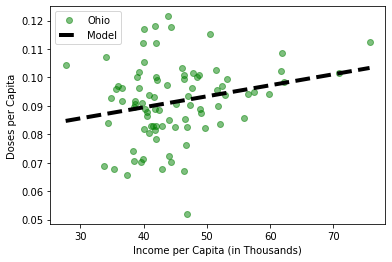

In [122]:
linear_model_state("ohio")

                            OLS Regression Results                            
Dep. Variable:                    DPC   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3700
Date:                Wed, 10 Mar 2021   Prob (F-statistic):              0.547
Time:                        22:16:31   Log-Likelihood:                 41.387
No. Observations:                  39   AIC:                            -78.77
Df Residuals:                      37   BIC:                            -75.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1597      0.067      2.401      0.0

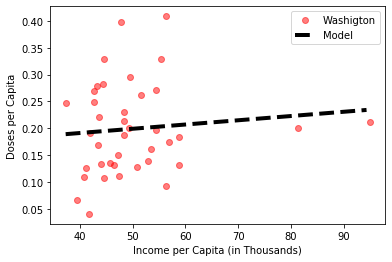

In [123]:
linear_model_state("wash")

                            OLS Regression Results                            
Dep. Variable:                    DPC   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.738
Date:                Wed, 10 Mar 2021   Prob (F-statistic):             0.0753
Time:                        22:17:51   Log-Likelihood:                 18.201
No. Observations:                  15   AIC:                            -32.40
Df Residuals:                      13   BIC:                            -30.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0624      0.139     -0.449      0.6

C:\Users\shush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


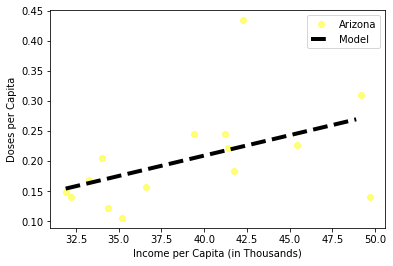

In [124]:
linear_model_state("ariz")

                            OLS Regression Results                            
Dep. Variable:                    DPC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.03804
Date:                Wed, 10 Mar 2021   Prob (F-statistic):              0.846
Time:                        22:19:28   Log-Likelihood:                 135.57
No. Observations:                 159   AIC:                            -267.1
Df Residuals:                     157   BIC:                            -261.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1696      0.038      4.514      0.0

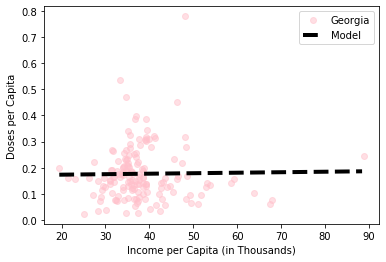

In [125]:
linear_model_state("geor")

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*